In this assignment students have to transform iris data into 3 dimensions  and plot a 3d chart with transformed dimensions and colour each data  point with specific class. 


In [62]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D  

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

In [64]:
df = sns.load_dataset('iris')

In [65]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [66]:
x = df.loc[:,['sepal_length','sepal_width','petal_length','petal_width']]
y = df.loc[:,['species']].values

In [67]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Parameter 1', 'Parameter 2', 'Parameter 3'])

In [68]:
principalDf

,Parameter 1,Parameter 2,Parameter 3
0,-2.684126,0.319397,-0.027915
1,-2.714142,-0.177001,-0.210464
2,-2.888991,-0.144949,0.017900
3,-2.745343,-0.318299,0.031559
4,-2.728717,0.326755,0.090079
...,...,...,...
145,1.944110,0.187532,0.177825
146,1.527167,-0.375317,-0.121898
147,1.764346,0.078859,0.130482
148,1.900942,0.116628,0.723252


In [69]:
df1 = pd.concat([principalDf,df[['species']]],axis=1)

In [70]:
df1

,Parameter 1,Parameter 2,Parameter 3,species
0,-2.684126,0.319397,-0.027915,setosa
1,-2.714142,-0.177001,-0.210464,setosa
2,-2.888991,-0.144949,0.017900,setosa
3,-2.745343,-0.318299,0.031559,setosa
4,-2.728717,0.326755,0.090079,setosa
...,...,...,...,...
145,1.944110,0.187532,0.177825,virginica
146,1.527167,-0.375317,-0.121898,virginica
147,1.764346,0.078859,0.130482,virginica
148,1.900942,0.116628,0.723252,virginica


In [71]:
targets = ['setosa','versicolor','virginica']
colors = ['y','b','m']

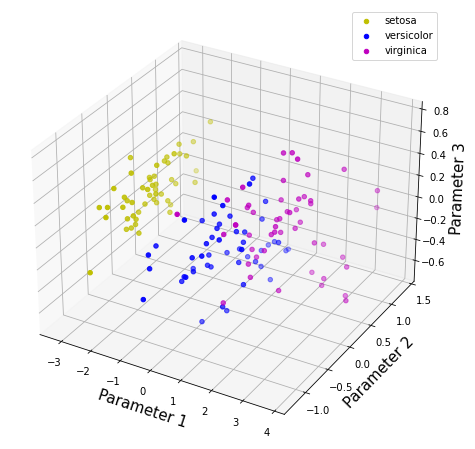

In [72]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Parameter 1', fontsize = 15)
ax.set_ylabel('Parameter 2', fontsize = 15)
ax.set_zlabel('Parameter 3', fontsize = 15)
for t1,c1 in zip(targets,colors):
    a = df1['species'] == t1
    ax.scatter3D(df1.loc[a,'Parameter 1'],df1.loc[a,'Parameter 2'],df1.loc[a,'Parameter 3'],c=c1)
ax.legend(targets)
ax.grid()
plt.show()